# DataCleaning - Taxi fare

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 데이터 불러오기

df = pd.read_csv('~/data/trip.csv')

data = df.copy()

## 데이터 탐색하기

In [8]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [9]:
# 데이터 컬럼명과 자료형을 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [10]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 중복 데이터 확인

In [12]:
# Q. 중복 데이터를 확인

data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [13]:
# Q. 중복 데이터를 확인

data[data['passenger_name'].isin(['Sarah Gross' , 'Lisa Bullock' ])]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [14]:
# Q. 중복 데이터를 제거합니다.

data = data.drop_duplicates()

In [16]:
# 제거 확인 1

data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [17]:
# 제거 확인 2

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22699 non-null  object 
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   payment_method         22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   fare_amount            22696 non-null  float64
 7   tip_amount             22699 non-null  float64
 8   tolls_amount           22699 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


## 결측치 확인 및 처리

- 결측치가 있는 행을 다 지우거나 
- 평균치, 중앙값, 최빈값으로 대체하거나
- 결측치가 너무 많은 경우 해당 컬럼을 삭제 해 버리거나

In [18]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [19]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [20]:
# Q. 결측치를 제거합니다.

## data.dropna(axis = 0).isna().sum()

dtf = data.dropna(axis = 0)

dtf.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

## 이상치 제거

### 이상치 on passenger_count

In [21]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
13718     0
5670      0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22699, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

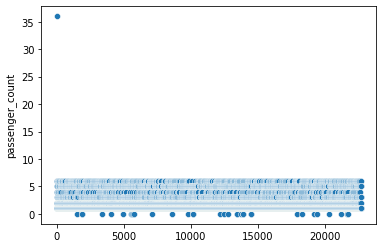

In [23]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(data = dtf, x = dtf.index, y = 'passenger_count')

In [24]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

dtf = dtf[dtf['passenger_count'] <= 6]

In [25]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(dtf[dtf['passenger_count'] == 0])

33

In [26]:
# passenger_count 컬럼의 이상치를 제거합니다.

dtf = dtf[dtf['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

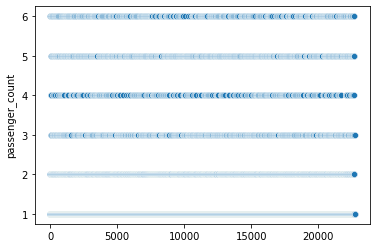

In [27]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(data = dtf, x = dtf.index, y = 'passenger_count')

### 이상치 on 수치형 컬럼

#### Trip distance

In [30]:
# Q. trip_distance의 이상치를 확인합니다.

dtf.columns

dtf['trip_distance'].describe()
dtf['trip_distance'].sort_values().head()
dtf[ dtf['trip_distance'] == 0]


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [31]:
# Q. trip_distance의 이상치를 제거합니다.

dtf = dtf[ dtf['trip_distance'] != 0]

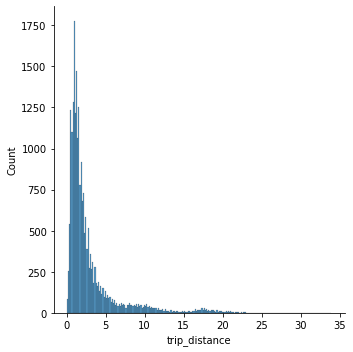

In [32]:
# Q. trip_distance의 히스토그램을 그립니다.

sns.displot(dtf['trip_distance'])

In [33]:
dtf.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


#### fare_amount

In [34]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

dtf[ dtf['fare_amount'] <= 0].shape[0] # 필터링된 데이터프레임의 행 갯수 반환

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [35]:
# Q. fare_amount의 이상치를 제거
# 0 이하 제거
dtf = dtf[ dtf['fare_amount'] > 0]

In [36]:
dtf.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.50,0.00,0.00
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [37]:
# 단위거리당 요금이 이상한 경우 확인 하여 제거 (fare_amount/trip_distance)

dtff = dtf.copy()

In [38]:
dtff['u_amt'] = dtff['fare_amount']/dtff['trip_distance']

In [39]:
dtff.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,1.645940,2.932624,12.974426,1.830814,0.309289,7.421695
std,1.285628,3.656023,12.668810,2.767607,1.385389,72.122341
min,1.000000,0.010000,0.010000,0.000000,0.000000,0.002222
25%,1.000000,1.000000,6.500000,0.000000,0.000000,4.325260
50%,1.000000,1.630000,9.500000,1.360000,0.000000,5.508475
75%,2.000000,3.090000,14.500000,2.450000,0.000000,7.068063
max,6.000000,33.960000,999.990000,200.000000,19.100000,5200.000000


In [40]:
dtff['u_amt'].sort_values()

4063        0.002222
2225        0.250000
13308       0.297619
19030       0.403226
15501       0.595238
            ...     
5431     2600.000000
19646    5200.000000
19829    5200.000000
3611     5200.000000
8199     5200.000000
Name: u_amt, Length: 22499, dtype: float64

<AxesSubplot:ylabel='u_amt'>

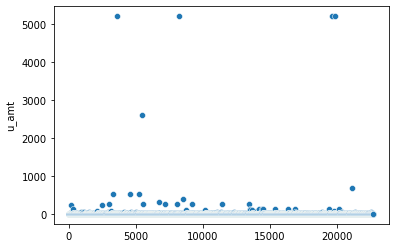

In [41]:
sns.scatterplot(data = dtff, x = dtff.index, y = 'u_amt')

In [42]:
dtff[ dtff['u_amt'] > 2000 ].shape[0]

5

In [46]:
dtff[ dtff['u_amt'] > 2000 ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt
3611,James Chen,11/19/2017 7:17:16 AM,11/19/2017 7:17:19 AM,Cash,1,0.01,52.0,0.00,0.00,5200.0
5431,Jeffrey Sullivan,12/09/2017 11:56:56 AM,12/09/2017 11:58:13 AM,Cash,1,0.02,52.0,11.71,5.76,2600.0
8199,Steven Brooks,05/16/2017 1:33:23 PM,05/16/2017 1:33:37 PM,Cash,1,0.01,52.0,0.00,0.00,5200.0
19646,Michael Solomon,12/13/2017 12:19:29 PM,12/13/2017 12:19:39 PM,Credit Card,1,0.01,52.0,17.57,5.76,5200.0
19829,Ms. Sarah Curtis MD,07/14/2017 6:09:54 AM,07/14/2017 6:11:40 AM,Cash,1,0.01,52.0,0.00,5.76,5200.0


<AxesSubplot:ylabel='fare_amount'>

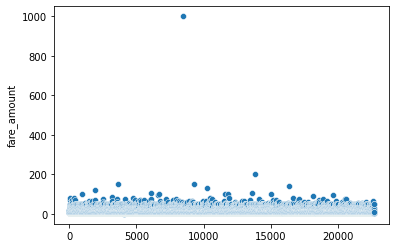

In [47]:
# 단위당 요금 이상치 제거 후 확인

dtff_n = dtff[ dtff['u_amt'] < 2000 ]

## Q. fare_amount의 scatter plot

sns.scatterplot(data = dtff_n, x = dtff_n.index, y = 'fare_amount')

In [49]:
dtff_n.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,3.892216
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,8.888889
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,6.500000
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,5.540541
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,3.775744


In [51]:
# fare_amount가 150 이상인 컬럼 처리

dtff_n[dtff_n['fare_amount'] > 150].shape[0]
dtff_n[dtff_n['fare_amount'] > 150]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00,20.821918
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.00,0.00,384.611538
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76,5.896521


In [48]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [53]:
dtff_n['fare_amount'].apply(fare_func).sort_values()

4063       0.01
9190       2.50
1512       2.50
17749      2.50
21153      2.50
          ...  
16381    140.00
9282     150.00
3584     150.00
13863    150.00
8478     150.00
Name: fare_amount, Length: 22494, dtype: float64

In [54]:
dtff_n = dtff_n.copy()  # 원본 데이터를 복사
dtff_n['fare_amount'] = dtff_n['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [55]:
dtff_n.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50,0.002222
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00,250.000000
1512,Amy Robertson,03/25/2017 4:37:43 AM,03/25/2017 4:37:49 AM,Credit Card,1,0.04,2.50,0.00,0.00,62.500000
17749,Tina Castro,06/13/2017 2:45:20 PM,06/13/2017 2:46:07 PM,Cash,1,0.10,2.50,0.00,0.00,25.000000
21153,Justin Jones,08/16/2017 6:59:42 AM,08/16/2017 7:00:34 AM,Debit Card,2,0.14,2.50,0.00,0.00,17.857143
...,...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26,5.490196
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00,4.416961
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00,20.821918
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.00,51.64,5.76,5.896521


#### tip_amount

<AxesSubplot:ylabel='tip_amount'>

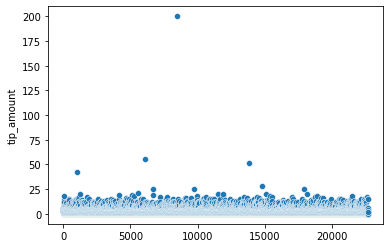

In [57]:
# Q. tip_amount의 scatter plot을 그립니다.

sns.scatterplot(data = dtff_n, x = dtff_n.index, y = 'tip_amount')

In [65]:
(dtff_n['tip_amount'] / dtff_n['fare_amount']).sort_values(ascending = False).head(15)

19030    4.000000
13388    2.888889
19371    2.800000
4730     2.727273
12307    2.000000
15871    1.428571
2440     1.428571
8478     1.333333
15785    1.250000
3486     1.242857
1095     1.176471
16607    1.145455
15139    1.142857
11111    1.111111
5382     1.052632
dtype: float64

In [67]:
dtff_m = dtff_n.copy()
dtff_m['t_f'] = dtff_m['tip_amount'] / dtff_m['fare_amount']
dtff_m.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000


In [69]:
len(dtff_m[dtff_m['t_f'] > 1 ])/len(dtff_m) # tip/fare ratio가 1이상인 자료의 비율 확인

0.0006668444918644973

In [71]:
dtff_m = dtff_m.copy()
dtff_m = dtff_m[dtff_m['t_f'] < 1 ]

<AxesSubplot:ylabel='tip_amount'>

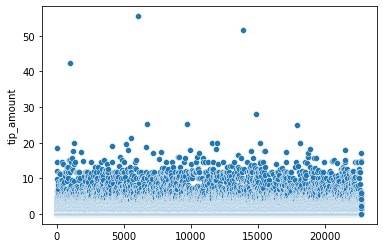

In [72]:
sns.scatterplot(data = dtff_m, x = dtff_m.index, y = 'tip_amount')

#### tolls_amount

<AxesSubplot:ylabel='tolls_amount'>

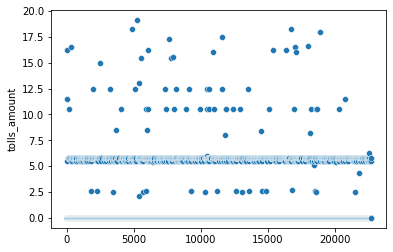

In [73]:
# Q. tolls_amount의 scatter plot을 그립니다.

sns.scatterplot(data = dtff_m, x = dtff_m.index, y = 'tolls_amount')

## 범주형 데이터 전처리

- 결제방법 : Debit Card와 Credit Card를 Card로 통합하기

In [74]:
dtff_m.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000


In [75]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

dtff_m['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [76]:
dtff_m['payment_method'].nunique()

3

In [77]:
dtff_m['payment_method'].value_counts()

Cash           11086
Debit Card      5727
Credit Card     5665
Name: payment_method, dtype: int64

In [78]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다. 
# (힌트: replace() 메서드를 사용합니다.)

dtff_m['payment_method'].replace({'Debit Card' : 'Card', 'Credit Card': 'Card'}, inplace = True)

In [79]:
dtff_m.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000


- 승객명: 성과 이름을 분리하여 성 부분만 저장

In [80]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

dtff_l = dtff_m.copy()
dtff_l['passenger_first_name'] = dtff_l['passenger_name'].str.split().apply(lambda x : x[0])

dtff_l


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00,3.892216,0.212308,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00,8.888889,0.250000,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00,6.500000,0.223077,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00,5.540541,0.311707,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00,3.775744,0.000000,Brianna
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00,6.557377,0.000000,Austin
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76,3.111909,0.281538,Monique
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00,10.714286,0.000000,Drew
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00,4.449153,0.161905,Jonathan


- 택시 탑승, 하차 시간을 활용

In [81]:
dtff_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22478 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22478 non-null  object 
 1   tpep_pickup_datetime   22478 non-null  object 
 2   tpep_dropoff_datetime  22478 non-null  object 
 3   payment_method         22478 non-null  object 
 4   passenger_count        22478 non-null  int64  
 5   trip_distance          22478 non-null  float64
 6   fare_amount            22478 non-null  float64
 7   tip_amount             22478 non-null  float64
 8   tolls_amount           22478 non-null  float64
 9   u_amt                  22478 non-null  float64
 10  t_f                    22478 non-null  float64
 11  passenger_first_name   22478 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 2.2+ MB


In [82]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

dtff_l['tpep_pickup_datetime'] = pd.to_datetime(dtff_l['tpep_pickup_datetime'])

In [83]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

dtff_l['tpep_dropoff_datetime'] = pd.to_datetime(dtff_l['tpep_dropoff_datetime'])

In [84]:
dtff_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22478 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22478 non-null  object        
 1   tpep_pickup_datetime   22478 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22478 non-null  datetime64[ns]
 3   payment_method         22478 non-null  object        
 4   passenger_count        22478 non-null  int64         
 5   trip_distance          22478 non-null  float64       
 6   fare_amount            22478 non-null  float64       
 7   tip_amount             22478 non-null  float64       
 8   tolls_amount           22478 non-null  float64       
 9   u_amt                  22478 non-null  float64       
 10  t_f                    22478 non-null  float64       
 11  passenger_first_name   22478 non-null  object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(3)
memory

In [85]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.
dtff_k = dtff_l.copy()
dtff_k['travel_time'] = dtff_k['tpep_dropoff_datetime'] - dtff_k['tpep_pickup_datetime']
dtff_k.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000,Brianna,0 days 00:16:43


In [86]:
dtff_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22478 entries, 0 to 22700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22478 non-null  object         
 1   tpep_pickup_datetime   22478 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22478 non-null  datetime64[ns] 
 3   payment_method         22478 non-null  object         
 4   passenger_count        22478 non-null  int64          
 5   trip_distance          22478 non-null  float64        
 6   fare_amount            22478 non-null  float64        
 7   tip_amount             22478 non-null  float64        
 8   tolls_amount           22478 non-null  float64        
 9   u_amt                  22478 non-null  float64        
 10  t_f                    22478 non-null  float64        
 11  passenger_first_name   22478 non-null  object         
 12  travel_time            22478 non-null  timedel

In [88]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

dtff_k['travel_time'] = dtff_k['travel_time'].dt.seconds

## Feature engineering 맛보기

In [89]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

dtff_j = dtff_k.copy()
dtff_j['total_amount'] = dtff_j['fare_amount'] + dtff_j['tip_amount'] + dtff_j['tolls_amount']
dtff_j.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000,Brianna,1003,16.50


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

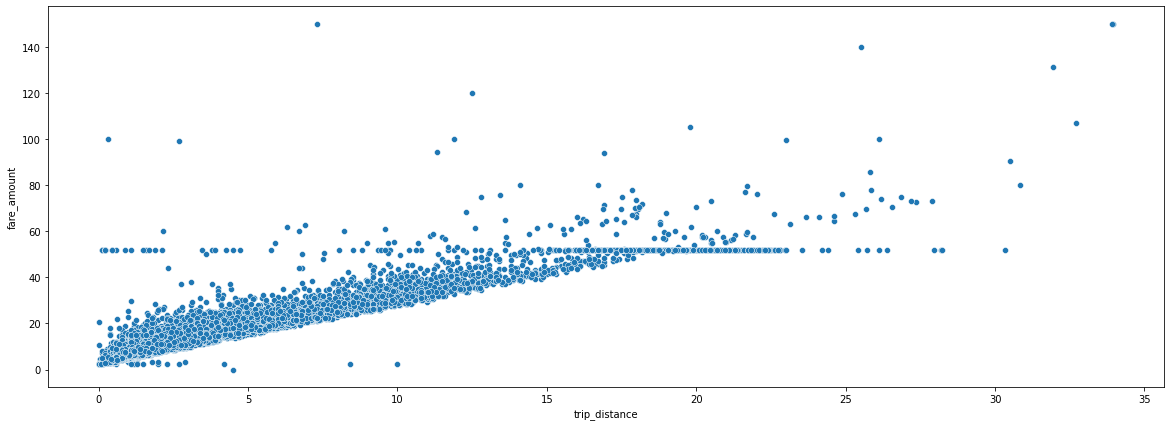

In [108]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.
plt.figure(figsize = (20,7))

sns.scatterplot(data = dtff_j, x = 'trip_distance', y = 'fare_amount')

In [95]:
dtff_j[(dtff_j['trip_distance'] > 30) & (dtff_j['fare_amount'] < 60)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f,passenger_first_name,travel_time,total_amount
5794,Tamara Bowen MD,2017-08-11 14:14:01,2017-08-11 15:17:31,Cash,1,30.33,52.0,14.64,5.76,1.714474,0.281538,Tamara,3810,72.4


<AxesSubplot:xlabel='travel_time', ylabel='fare_amount'>

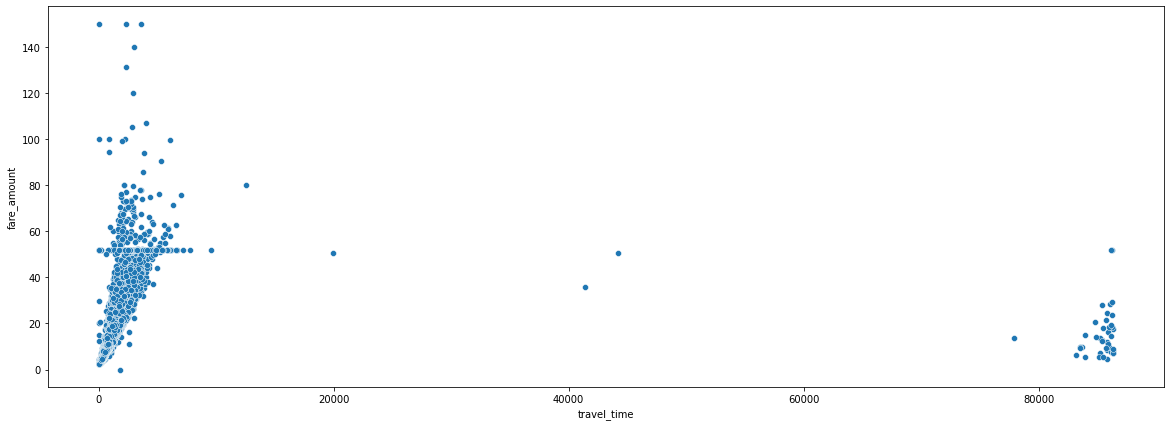

In [106]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.
plt.figure(figsize = (20,7))

sns.scatterplot(data = dtff_j, x = 'travel_time', y = 'fare_amount')

<AxesSubplot:xlabel='travel_time', ylabel='trip_distance'>

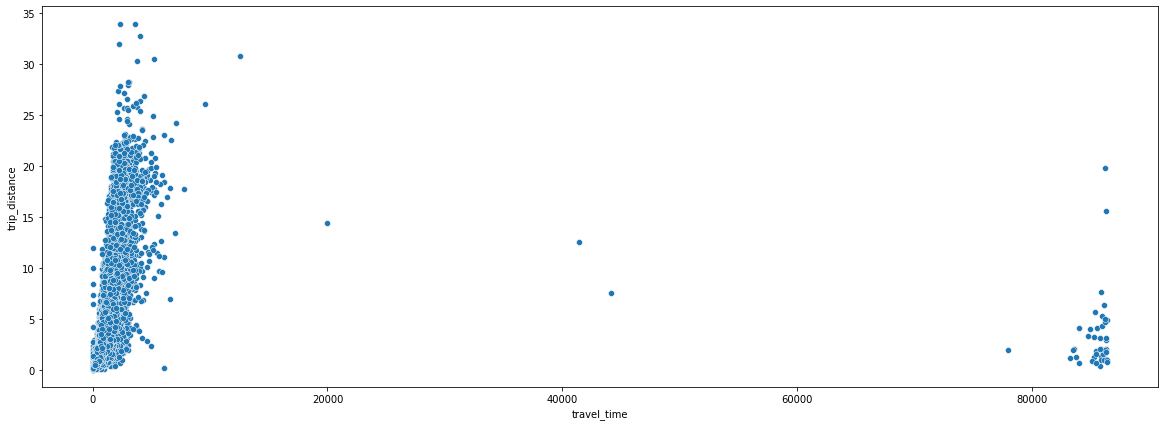

In [107]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

plt.figure(figsize = (20,7))

sns.scatterplot(data = dtff_j, x = 'travel_time', y = 'trip_distance')

In [109]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

(dtff_j['travel_time'] > 18000).value_counts()

dtff_i = dtff_j.copy()

dtff_i = dtff_i[dtff_i['travel_time'] < 18000]

dtff_i.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,u_amt,t_f,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,3.892216,0.212308,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000,Brianna,1003,16.50
